# 关于德国负荷预测的结果

In [2]:
from pylab import *
plt.rc('font',family='Times New Roman')#全局改成Times New Roman

import keras
keras.__version__

import os
import matplotlib.pyplot as plt

fname = os.path.join( '负荷预测结果.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:8684]

print(header)
print(len(lines))

import numpy as np

float_data_qian = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data_qian[i, :] = values

['data', 'load', 'GRU', 'lstm', 'RF', 'LM', 'GB', 'SVM', 'SVR', 'Target2']
8683


In [3]:
  
load = float_data_qian[:, 0]  
gru = float_data_qian[:, 1]
lstm = float_data_qian[:, 2]    
rf = float_data_qian[:, 3]
lm = float_data_qian[:, 4]
gb = float_data_qian[:, 5]
svm = float_data_qian[:, 6]
svr = float_data_qian[:, 7]
target = float_data_qian[:, 8]

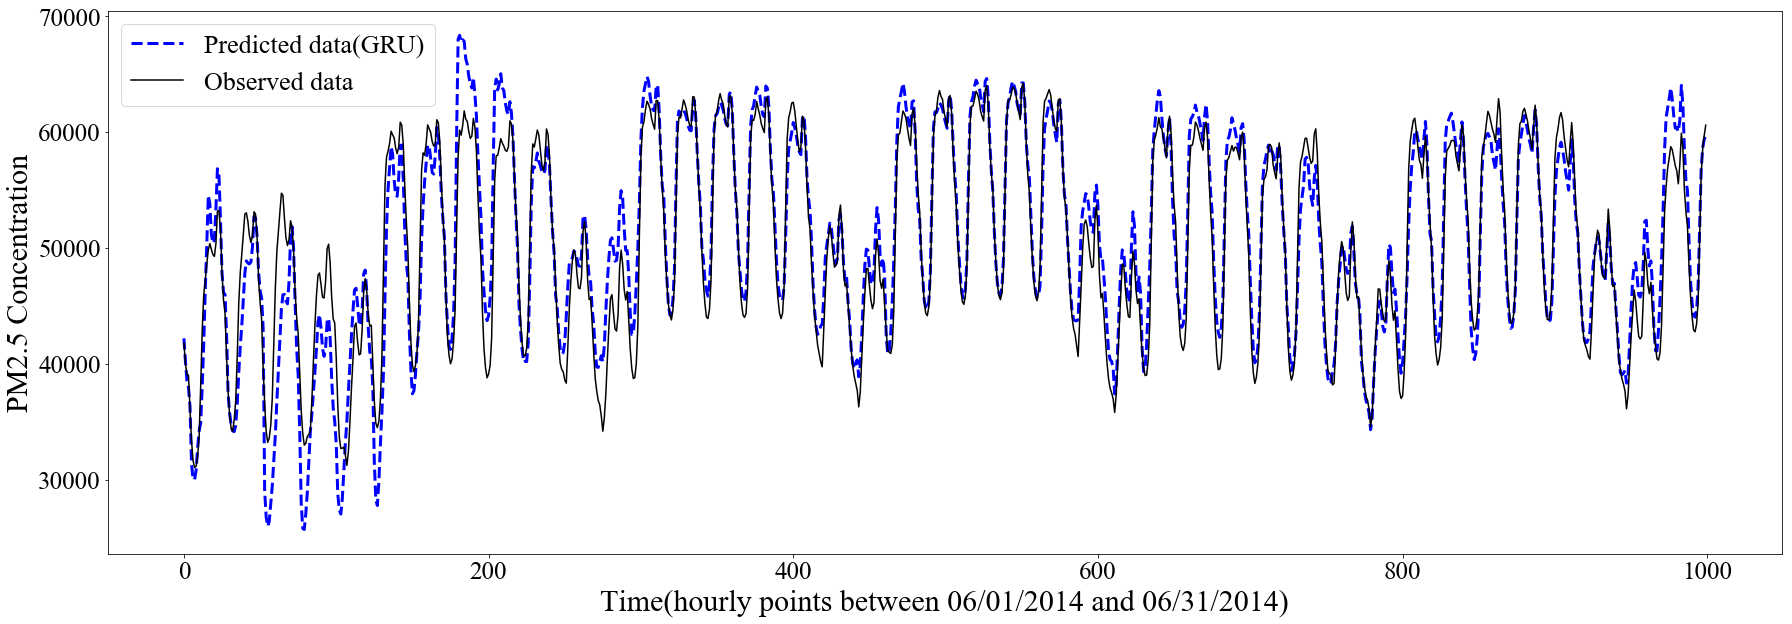

In [4]:
#6月
plt.figure(figsize=(30,10))
#plt.plot(target,'k-',  label='Observed data')#黑色实线
#plt.plot(gru, 'b--',label='Predicted data(GRU)', linewidth = 3)
#plt.plot(lstm,'r:',  label='Predicted data(LSTM)', linewidth = 3)#红色点线
plt.plot(svr[:1000], 'b--',label='Predicted data(GRU)', linewidth = 3)
plt.plot(target[:1000],'k-',  label='Observed data')
#调整坐标轴刻度的大小
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

#plt.title('Actual value and predicted value',fontsize=20)
plt.xlabel('Time(hourly points between 06/01/2014 and 06/31/2014)',fontsize=30)
plt.ylabel('PM2.5 Concentration',fontsize=30)
#plt.legend()

# 设置图例字体大小
plt.legend(fontsize=26)
plt.show()

In [5]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(actual, predicted):
    a = np.abs(np.array(actual) - np.array(predicted))
    b = np.array(actual) + np.array(predicted)
    
    return 2 * np.mean(np.divide(a, b, out=np.zeros_like(a), where=b!=0, casting='unsafe'))
def errors(y_true, y_pred): 
    target = y_true
    prediction = y_pred

    error = []
    for i in range(len(target)):
        error.append(target[i] - prediction[i])

    #print("Errors: ", error)
    #print(error)

    squaredError = []
    absError = []
    for val in error:
        squaredError.append(val * val)#target-prediction之差平方 
        absError.append(abs(val))#误差绝对值

    #print("Square Error: ", squaredError)
    #print("Absolute Value of Error: ", absError)

    print("MSE = ", sum(squaredError) / len(squaredError))#均方误差MSE


    from math import sqrt
    print("RMSE = ", sqrt(sum(squaredError) / len(squaredError)))#均方根误差RMSE
    print("MAE = ", sum(absError) / len(absError))#平均绝对误差MAE
    print("==================  ")

In [6]:
print('RF_MAPE:', mean_absolute_percentage_error(target, rf))
print('RF_SMAPE:', smape(target, rf))
print('RF:')
errors(target, rf)

print('LM_MAPE:', mean_absolute_percentage_error(target, lm))
print('LM_SMAPE:', smape(target, lm))
print('LM:')
errors(target, lm)

print('HM_MAPE:', mean_absolute_percentage_error(target, load))
print('HM_SMAPE:', smape(target, load))
print('HM:')
errors(target, load)

print('GB_MAPE:', mean_absolute_percentage_error(target, gb))
print('GB_SMAPE:', smape(target, gb))
print('GB:')
errors(target, gb)
      
print('SVM_MAPE:', mean_absolute_percentage_error(target, svm))
print('SVM_SMAPE:', smape(target, svm))
print('SVM:')
errors(target, svm)
      
print('SVR_MAPE:', mean_absolute_percentage_error(target, svr))
print('SVR_SMAPE:', smape(target, svr))
print('SVR:')
errors(target, svr)  

      
print('GRU_MAPE:', mean_absolute_percentage_error(target, gru))
print('GRU_SMAPE:', smape(target, gru))
print('GRU:')
errors(target, gru)

      
print('LSTM_MAPE:', mean_absolute_percentage_error(target, lstm))
print('LSTM_SMAPE:', smape(target, lstm))
print('LSTM:')
errors(target, lstm)

RF_MAPE: 2.714973741595924
RF_SMAPE: 0.026506340081429876
RF:
MSE =  4473880.218916857
RMSE =  2115.154892417304
MAE =  1244.3624492283773
LM_MAPE: 7.960077694164007
LM_SMAPE: 0.07862966791496333
LM:
MSE =  22586300.989252258
RMSE =  4752.504706915319
MAE =  3715.8092168547737
HM_MAPE: 8.416374635224134
HM_SMAPE: 0.08502815790178499
HM:
MSE =  37686445.15976105
RMSE =  6138.928665472587
MAE =  3950.0711551307154
GB_MAPE: 2.84015060242776
GB_SMAPE: 0.027806406124327117
GB:
MSE =  4591431.485472294
RMSE =  2142.7625826190574
MAE =  1290.7910469756996
SVM_MAPE: 3.623927256086066
SVM_SMAPE: 0.035332315286074764
SVM:
MSE =  6461323.6022890285
RMSE =  2541.9133742692784
MAE =  1651.9596948001843
SVR_MAPE: 3.3416476748514805
SVR_SMAPE: 0.03272785975399599
SVR:
MSE =  5959119.561475877
RMSE =  2441.1307956510395
MAE =  1531.4335600126683
GRU_MAPE: 0.7649759301217451
GRU_SMAPE: 0.007633754914268795
GRU:
MSE =  268269.1395920849
RMSE =  517.9470432313374
MAE =  364.1985870044915
LSTM_MAPE: 0.794

In [7]:
target = target
prediction = svr
  
error = []
for i in range(len(target)):
    error.append(target[i] - prediction[i])
  
#print("Errors: ", error)
#print(error)
  
squaredError = []
absError = []
for val in error:
    squaredError.append(val * val)#target-prediction之差平方 
    absError.append(abs(val))#误差绝对值
 
#print("Square Error: ", squaredError)
#print("Absolute Value of Error: ", absError)
 
print("MSE = ", sum(squaredError) / len(squaredError))#均方误差MSE
 
 
from math import sqrt
print("RMSE = ", sqrt(sum(squaredError) / len(squaredError)))#均方根误差RMSE
print("MAE = ", sum(absError) / len(absError))#平均绝对误差MAE

MSE =  5959119.561475877
RMSE =  2441.1307956510395
MAE =  1531.4335600126683


# 画箱线图

In [8]:
lstm_n = lstm-target
gru_n = gru-target
svr_n = svr-target
svm_n = svm-target
rf_n = rf-target
lm_n = lm-target
hm_n = load-target
gb_n = gb-target

errordata = np.zeros((8683, 7))
 
errordata[:,0] = gru_n 
errordata[:,1] = lstm_n 
errordata[:,2] = rf_n
errordata[:,3] = gb_n 
errordata[:,4] = svr_n 
#errordata[:,5] = svm_n  
errordata[:,5] = lm_n 
errordata[:,6] = hm_n 

errordata.shape

(8683, 7)

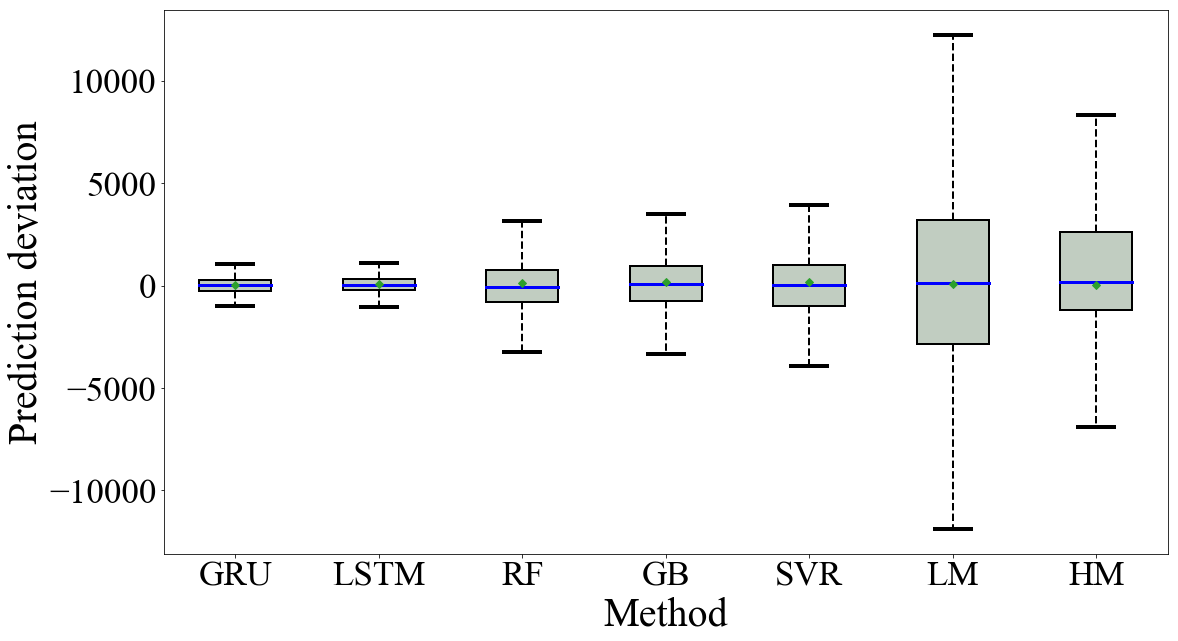

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plt.boxplot(
    x=errordata,
    notch = False,#是否是凹口的形式展现箱型图
    patch_artist=True,#是否填充箱体的颜色
    
    labels=['GRU','LSTM','RF','GB','SVR','LM','HM'],
    
    meanline = False,
    showmeans = True,  # 是否有均值线及其形状 -用点表示均值 -显示均值
    showbox = True,   # 是否显示箱线
    showfliers = False,  #是否显示异常值


    boxprops={'color':'black','facecolor':'#C1CDC1','linewidth':2},
    flierprops={'marker':'+','markerfacecolor':'black','color':'black'},#设置异常点属性，点的形状，填充颜色和边框色
    meanprops={'marker':'D','linewidth':20},#均值属性   点的颜色和形状'markerfacecolor':'r','color':'m',
    capprops={'color':'k','linewidth':4},#设置箱线图顶端和末端线条的属性，如颜色，粗细等
    whiskerprops={"linestyle":'--','color':'k','linewidth':2},#设置须的属性，如颜色，粗细，线的类型
    medianprops={"linestyle":'-','color':'b','linewidth':3})   #中位数属性 线形和颜色       blue



# 设置图表标题并给坐标轴加上标签
#plt.title("CBGRU",fontsize=24)
plt.xlabel("Method",fontsize=40)
plt.ylabel("Prediction deviation",fontsize=40)

# 设置刻度标记的大小
plt.tick_params(axis='both',which='major',labelsize=35)
#plt.grid(True)
#plt.savefig('负荷箱线图.pdf', bbox_inches='tight')
plt.show()

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(180,100))
plt.boxplot(
    x=errordata,
    notch = False,#是否是凹口的形式展现箱型图
    patch_artist=True,#是否填充箱体的颜色
    
    labels=['GRU','LSTM','RF','GB','SVR','LM','HM'],
    
    meanline = False,
    showmeans = True,  # 是否有均值线及其形状 -用点表示均值 -显示均值
    showbox = True,   # 是否显示箱线
    showfliers = False,  #是否显示异常值


    boxprops={'color':'black','facecolor':'#C1CDC1','linewidth':20},
    flierprops={'marker':'+','markerfacecolor':'black','color':'black'},#设置异常点属性，点的形状，填充颜色和边框色
    meanprops={'marker':'D','linewidth':200},#均值属性   点的颜色和形状'markerfacecolor':'r','color':'m',
    capprops={'color':'k','linewidth':40},#设置箱线图顶端和末端线条的属性，如颜色，粗细等
    whiskerprops={"linestyle":'--','color':'k','linewidth':20},#设置须的属性，如颜色，粗细，线的类型
    medianprops={"linestyle":'-','color':'b','linewidth':30})   #中位数属性 线形和颜色       blue



# 设置图表标题并给坐标轴加上标签
#plt.title("CBGRU",fontsize=24)
plt.xlabel("Method",fontsize=400)
plt.ylabel("Prediction deviation",fontsize=400)

# 设置刻度标记的大小
plt.tick_params(axis='both',which='major',labelsize=350)
#plt.grid(True)

plt.show()